In [1]:
import matplotlib.pyplot as plt
import networkx as nx 
import numpy as np

from tqdm import tqdm

import severability

# Multiscale severability applied to 2D grid graph

Graph with 100 nodes and 180 edges


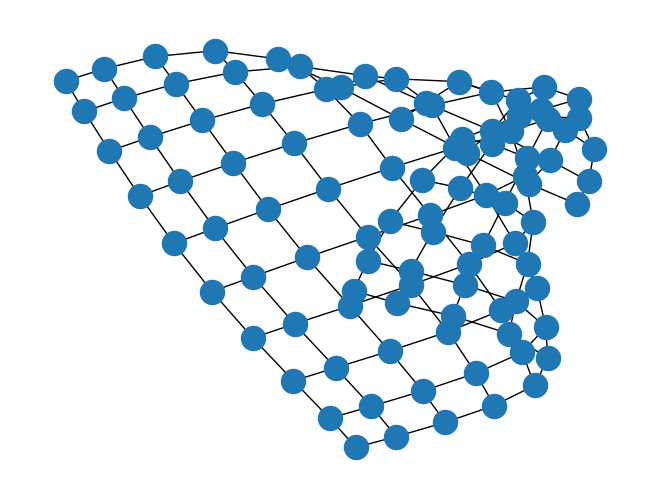

In [2]:
# get 2D grid graph
G = nx.grid_2d_graph(10,10)
print(G)
nx.draw(G)

In [3]:
# get adjacency matrix and convert to np.matrix
A = nx.to_numpy_array(G)
A = np.matrix(A)

# compute transition matrix
P = severability.transition_matrix(A)

In [4]:
# run multiscale severability
sev_results = severability.multiscale_severability(P, 20, n_tries=30, n_rand=30, n_workers=4)

Optimise severability ...


100%|██████████| 20/20 [02:19<00:00,  6.99s/it]


Compute 1-Rand(t) ...


100%|██████████| 20/20 [00:10<00:00,  1.83it/s]


Compute 1-Rand(t,t') ...


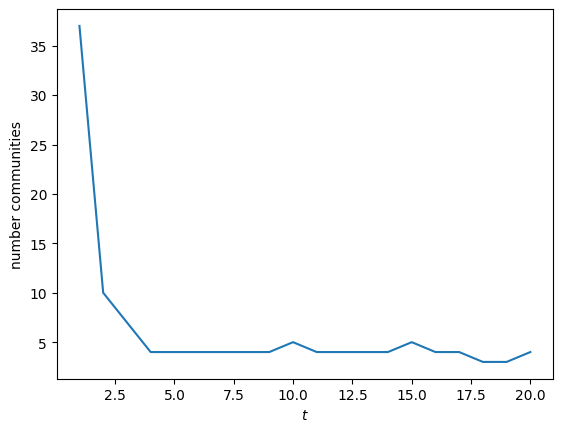

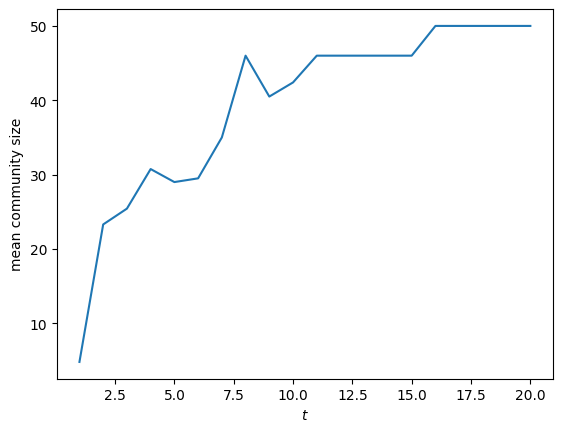

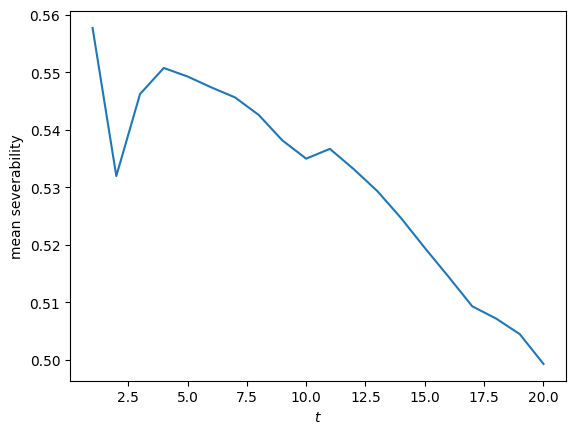

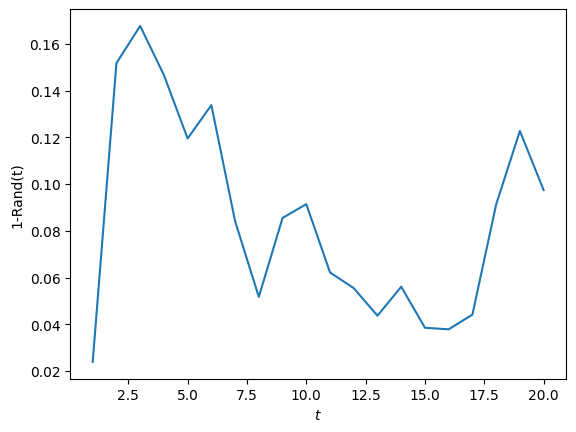

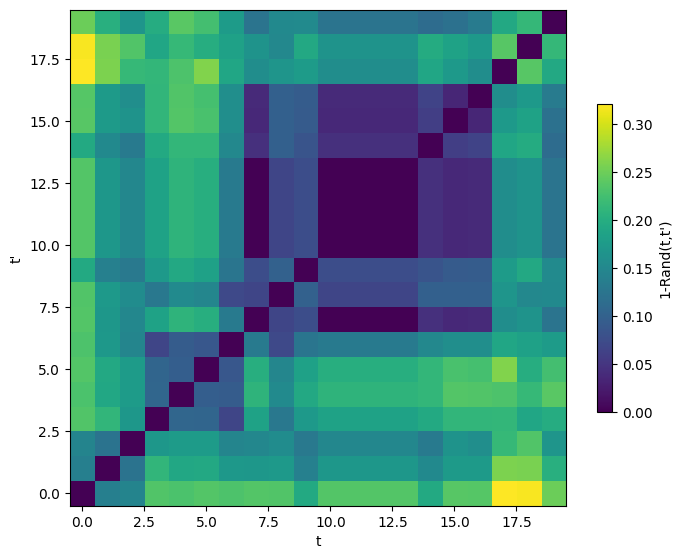

In [7]:
scales = sev_results["scales"]
n_communities = sev_results["n_communities"]
s_communities = sev_results["mean_size"]
mean_severabilities = sev_results["mean_sev"]
rand_t = sev_results["rand_t"]
rand_ttprime = sev_results["rand_ttprime"]

fig, ax = plt.subplots(1)
ax.plot(scales,n_communities)
ax.set(xlabel="$t$", ylabel="number communities")
plt.show()


fig, ax = plt.subplots(1)
ax.plot(scales,s_communities)
ax.set(xlabel="$t$", ylabel="mean community size")
plt.show()

fig, ax = plt.subplots(1)
ax.plot(scales,mean_severabilities)
ax.set(xlabel="$t$", ylabel="mean severability")
plt.show()

fig, ax = plt.subplots(1)
ax.plot(scales,rand_t)
ax.set(xlabel="$t$", ylabel="1-Rand(t)")
plt.show()

plt.figure(figsize = (8,8))
plt.imshow(rand_ttprime, origin="lower")
plt.colorbar(label = "1-Rand(t,t')", shrink=0.5)
plt.xlabel("t")
plt.ylabel("t'")
plt.show()